In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("../input/common-voice/cv-valid-train.csv") 
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN


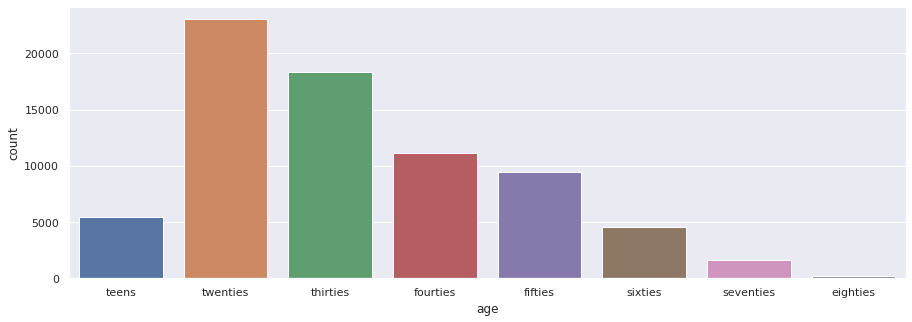

In [21]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=df[df['age'].notna()], 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


In [22]:
df = df[['filename','age']]

#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age
0,cv-valid-train/sample-000005.mp3,twenties
1,cv-valid-train/sample-000008.mp3,seventies
2,cv-valid-train/sample-000013.mp3,thirties
3,cv-valid-train/sample-000014.mp3,sixties
4,cv-valid-train/sample-000019.mp3,fifties


 FEATURE EXTRACTION

In [23]:
import librosa
ds_path = "/kaggle/input/common-voice/cv-valid-train/"

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(data.iloc[0]['filename'])
print("features: ", features)

features:  [2679.9395691628692, 3347.669488765762, 5745.486745886655, -625.21814, 111.32094, 6.3269944, 34.757614, 31.619902, -4.714646, -0.48603064, -4.9340243, -12.714733, -2.0551484, -3.7411177, -10.702963, -11.202637, -12.003523, -8.48958, -5.463276, -4.9542165, -3.7151983, -6.3305287, -6.3384743]


In [54]:

def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 30000
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data)
df_features.head()

29999/73767

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,2679.939569,3347.669489,5745.486746,-625.218140,111.320938,6.326994,34.757614,31.619902,-4.714646,-0.486031,...,-10.702963,-11.202637,-12.003523,-8.489580,-5.463276,-4.954216,-3.715198,-6.330529,-6.338474,twenties
1,2859.467798,2576.661658,4912.241181,-469.897675,126.299873,-16.546749,3.553606,2.178288,13.770478,-1.293437,...,-10.987108,1.146530,6.103549,-1.724739,-1.226475,-6.429199,-7.261915,-4.788061,-3.121077,seventies
2,1976.049163,1830.611037,3344.301008,-418.205048,147.668320,-49.972744,-2.285531,37.187012,-8.904264,-14.226655,...,-13.845863,-9.927490,-7.871619,-5.473860,-2.295655,-6.554991,-5.206914,-0.407431,-3.882371,thirties
3,2333.782018,2533.276030,4398.731436,-464.911224,118.436134,19.749296,27.143938,26.439018,2.309575,-9.354494,...,-5.458494,-2.907650,-4.495940,-2.715732,-0.079105,-5.292979,-5.866175,0.601412,-3.376775,sixties
4,2351.958974,2974.758776,4743.172457,-343.828766,157.151764,7.660183,41.900478,-15.153757,28.925409,0.091549,...,0.101646,6.319596,-1.603062,3.837600,-2.643968,2.324786,-1.382977,3.790324,-3.534814,fifties


In [55]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [56]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])

Before scaling: [2679.9395691628692 3347.669488765762 5745.486745886655 -625.2181396484375
 111.32093811035156 6.3269944190979 34.75761413574219 31.619901657104492
 -4.714645862579346 -0.486030638217926 -4.934024333953857
 -12.714733123779297 -2.0551483631134033 -3.7411177158355713
 -10.702962875366211 -11.20263671875 -12.003522872924805
 -8.489580154418945 -5.463275909423828 -4.954216480255127
 -3.715198278427124 -6.330528736114502 -6.338474273681641]

After scaling: [-0.25987915  0.7097317   0.16449845 -1.99796008 -0.21359015  0.48455671
  0.77591265  1.68311737 -0.86681634  0.17214445 -0.27808089 -1.09010144
  0.46064246 -0.0217562  -1.17620641 -1.70164541 -1.32448547 -1.17843618
 -0.55596954 -0.36780946 -0.50348476 -1.03433183 -0.65052311]


In [57]:
df_features['label'].unique()


array(['twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


In [75]:
# Print encoded labels for all instances
print(y)

decoded_labels = encoder.inverse_transform(y)
print(decoded_labels)


[7 3 6 ... 2 2 5]
['twenties' 'seventies' 'thirties' ... 'fourties' 'fourties' 'teens']


# FEATURE SELECTION

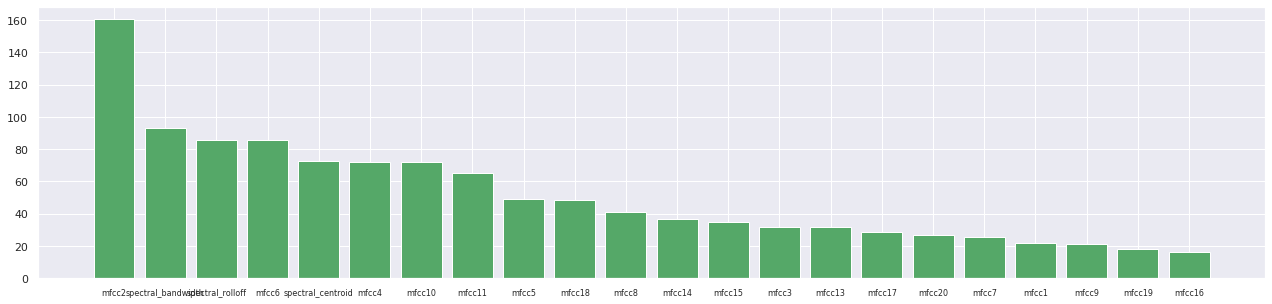

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()


### Model Selection using cross validation

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

classifiers_and_params = [
    (SVC(), {'C': [200, 150, 100], 'gamma': ['auto', 'scale']}),
    (RandomForestClassifier(), {'n_estimators': [100, 150, 200]})
]

for tup in classifiers_and_params:
    print("{}".format(tup[0].__class__.__name__))
    
   
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
    fold_counter = 0

    results = list()
    for train_idx, test_idx in outer_cv.split(X_new):
        fold_counter += 1
        
        
        X_train, X_test = X_new[train_idx], X_new[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

       
        inner_cv = KFold(n_splits=2, shuffle=True, random_state=0)
        gs = GridSearchCV(tup[0], tup[1], scoring='f1_macro', cv=inner_cv, refit=True)
        res = gs.fit(X_train, y_train)

        # get the best model, re-fit on the whole training set
        best_model = res.best_estimator_

        pred = best_model.predict(X_test)
        score = f1_score(y_test, pred, average='macro')
        results.append(score)
        
        print("\tFold {}, Best Params {} with F1 Score {:.3f}, F1 Score on Test data {:.3f}"
              .format(fold_counter, res.best_params_, res.best_score_, score))

    print('\tAverage F1 Score on Test Set: {:.3f}\n'.format(np.mean(results)))

SVC
	Fold 1, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.701, F1 Score on Test data 0.762
	Fold 2, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.694, F1 Score on Test data 0.756
	Fold 3, Best Params {'C': 100, 'gamma': 'scale'} with F1 Score 0.681, F1 Score on Test data 0.763
	Average F1 Score on Test Set: 0.761

RandomForestClassifier
	Fold 1, Best Params {'n_estimators': 100} with F1 Score 0.538, F1 Score on Test data 0.596
	Fold 2, Best Params {'n_estimators': 200} with F1 Score 0.527, F1 Score on Test data 0.630
	Fold 3, Best Params {'n_estimators': 150} with F1 Score 0.519, F1 Score on Test data 0.619
	Average F1 Score on Test Set: 0.615



In [61]:
import itertools
import matplotlib.pyplot as plt

def my_plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


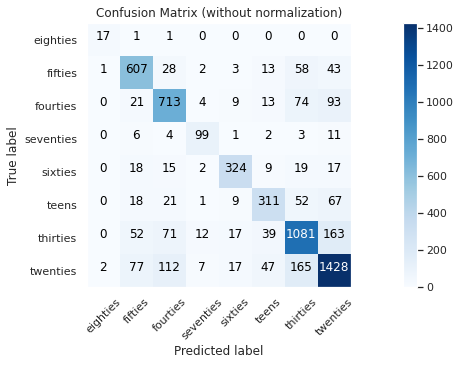

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
my_plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

In [65]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7633333333333333


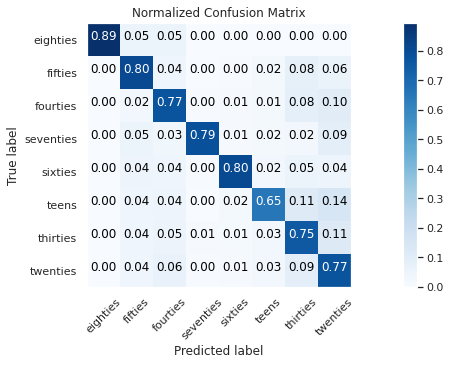

In [66]:
# Plot normalized confusion matrix
plt.figure()
my_plot_confusion_matrix(cm, classes=classes, normalize=True)

plt.grid(False)
plt.show()

In [67]:
import joblib
filename = 'svm_for_age_pred.sav'
joblib.dump(model, filename)

['svm_for_age_pred.sav']